<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [33]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2023-08-07 17:02:49--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2023-08-07 17:02:49--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2023-08-07 17:02:49 (11.5 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2023-08-07 17:02:49--
Total wall clock time: 0.4s
Downloaded: 1 files, 418K in 0.04s (11.5 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [5]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('weight_height.csv')
des = df.copy()
des.loc['NaN'] = df.isna().sum()
des

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [6]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(inplace= True)

In [9]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df.copy()
df2.columns = ['sexo', 'altura', 'peso']
df2['sexo'] = df2['sexo'].apply(lambda x: 'masculino' if x == 'Male' else 'femenino')
df2['altura'] = df2['altura'].apply(lambda x: x * 0.0254)
df2['peso'] = df2['peso'].apply(lambda x: x // 2.2046)
df2

,sexo,altura,peso
0,masculino,1.875714,109.0
1,masculino,1.747060,73.0
2,masculino,1.882397,96.0
3,masculino,1.821967,99.0
4,masculino,1.774998,93.0
...,...,...,...
9995,femenino,1.680785,62.0
9996,femenino,1.703506,77.0
9997,femenino,1.622247,58.0
9998,femenino,1.753470,74.0


In [14]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print(df2.shape[0])

10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

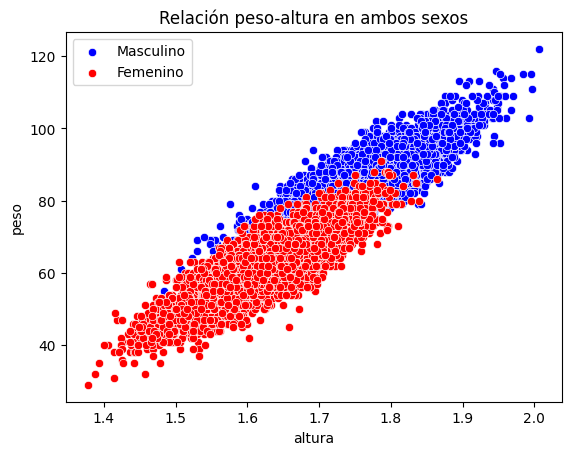

In [24]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
alt_masc = df2.altura[df2.sexo == 'masculino']
alt_fem = df2.altura[df2.sexo == 'femenino']
peso_masc = df2.peso[df2.sexo == 'masculino']
peso_fem = df2.peso[df2.sexo == 'femenino']

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=alt_masc, y=peso_masc, color='blue')
sns.scatterplot(x=alt_fem, y=peso_fem, color='red')
ax.legend(loc='upper left', labels=['Masculino', 'Femenino'])
ax.set_title('Relación peso-altura en ambos sexos')
plt.show()

Promedio de altura masculina: 1.7532691860179221


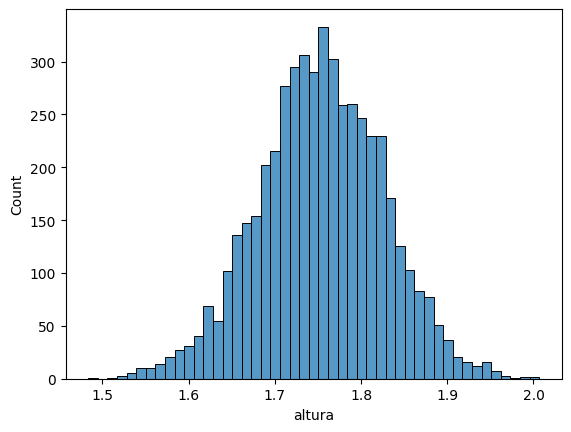

In [29]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.histplot(x=alt_masc)
print('Promedio de altura masculina:', np.mean(alt_masc))


Promedio de altura femenina: 1.6182028495269967


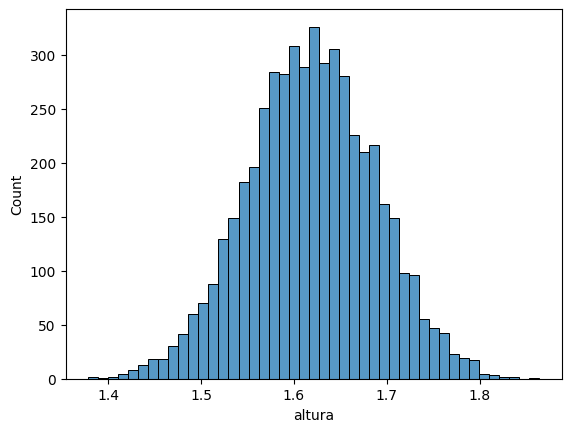

In [30]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.histplot(x=alt_fem)
print('Promedio de altura femenina:', np.mean(alt_fem))

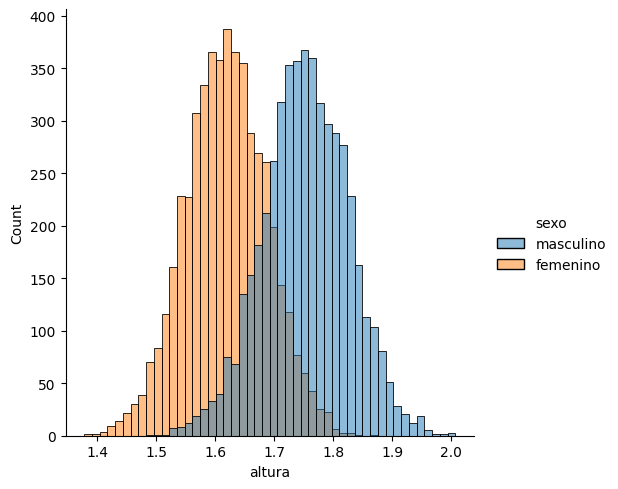

In [31]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo")

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


0.7153475052632123


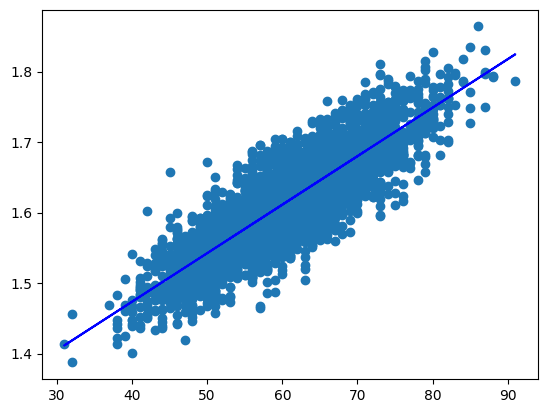

In [37]:
X = df2[['peso']][df2.sexo == 'femenino'].values
y = df2['altura'][df2.sexo == 'femenino'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.3, random_state= 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

score = r2_score(y_test, y_hat)
print(score)

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X_test, y_test, label='datos reales')
plt.plot(X_test, y_hat, color='blue', label='y_hat_model')
plt.show()

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">